In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

# Анализ гонок Формулы-1 за 1950-2024 годы

## Импортируем данные по победителям Гран-При

__Grand Prix__ - Название Гран-При 

__Date__ - Дата проведения гонки

__Winner__ - Победитель

__Car__ - Машина/компания, победившая в заезде

__Laps__ - Количество кругов на гонке

__Time__ - Время завершения гонки

__Name Code__ - 3-х значный код гонщика

### Предобработка данных

In [161]:
winners = pd.read_csv('winners.csv', parse_dates=['Date'])

In [162]:
winners.head()

,Grand Prix,Date,Winner,Car,Laps,Time,Name Code
0,Great Britain,1950-05-13,Nino Farina,Alfa Romeo,70.0,2:13:23.600,FAR
1,Monaco,1950-05-21,Juan Manuel Fangio,Alfa Romeo,100.0,3:13:18.700,FAN
2,Indianapolis 500,1950-05-30,Johnnie Parsons,Kurtis Kraft Offenhauser,138.0,2:46:55.970,PAR
3,Switzerland,1950-06-04,Nino Farina,Alfa Romeo,42.0,2:02:53.700,FAR
4,Belgium,1950-06-18,Juan Manuel Fangio,Alfa Romeo,35.0,2:47:26.000,FAN


In [163]:
winners.shape

(1110, 7)

In [164]:
# Обнаружилось 3 строки со значениями NaN в колонках «Laps» и «Time», но удалять их было бы неправильно, поскольку пропадут записи об определенных победителях, поэтому оставим их
winners[winners.isna().any(axis=1)]

,Grand Prix,Date,Winner,Car,Laps,Time,Name Code
11,France,1951-07-01,Luigi Fagioli,Alfa Romeo,NaN,NaN,FAG
49,Argentina,1956-01-22,Luigi Musso,Ferrari,NaN,NaN,MUS
63,Great Britain,1957-07-20,Tony Brooks,Vanwall,NaN,NaN,BRO


In [165]:
winners.dtypes

Grand Prix            object
Date          datetime64[ns]
Winner                object
Car                   object
Laps                 float64
Time                  object
Name Code             object
dtype: object

In [166]:
# Преобразуем колонку Time в формат времени
winners.Time = winners['Time'].apply(lambda x: x if pd.isna(x) or len(x.split(':')) == 3 else '00:' + x)
winners['Time'] = pd.to_timedelta(winners.Time)

In [167]:
# Переименуем названия колонок для удобства
winners.columns = winners.columns.str.lower().str.replace(' ', '_')

In [168]:
winners.describe()

,date,laps,time
count,1110,1107.000000,1107
mean,1992-08-13 17:37:17.837837952,64.654020,0 days 01:46:10.192981933
min,1950-05-13 00:00:00,1.000000,0 days 00:03:27.071000
25%,1976-08-18 12:00:00,54.000000,0 days 01:30:44.143000
50%,1994-05-22 00:00:00,65.000000,0 days 01:38:13.830000
75%,2010-07-07 12:00:00,72.000000,0 days 01:53:16.573500
max,2024-05-05 00:00:00,200.000000,0 days 04:04:39.537000
std,NaN,20.267526,0 days 00:27:12.122955985


In [169]:
winners.head()

,grand_prix,date,winner,car,laps,time,name_code
0,Great Britain,1950-05-13,Nino Farina,Alfa Romeo,70.0,0 days 02:13:23.600000,FAR
1,Monaco,1950-05-21,Juan Manuel Fangio,Alfa Romeo,100.0,0 days 03:13:18.700000,FAN
2,Indianapolis 500,1950-05-30,Johnnie Parsons,Kurtis Kraft Offenhauser,138.0,0 days 02:46:55.970000,PAR
3,Switzerland,1950-06-04,Nino Farina,Alfa Romeo,42.0,0 days 02:02:53.700000,FAR
4,Belgium,1950-06-18,Juan Manuel Fangio,Alfa Romeo,35.0,0 days 02:47:26,FAN


### Анализ данных

In [170]:
# Для начала найдем топ-10 гонщиков по победам в заездах Гран-При
top_10_winners = winners.groupby('winner', as_index=False).size().sort_values('size', ascending=False).head(10).rename(columns={'winner': 'racer', 'size' : 'races_won'})
top_10_winners

,racer,races_won
66,Lewis Hamilton,103
75,Michael Schumacher,91
74,Max Verstappen,58
105,Sebastian Vettel,53
0,Alain Prost,51
4,Ayrton Senna,41
24,Fernando Alonso,32
81,Nigel Mansell,31
37,Jackie Stewart,27
82,Niki Lauda,25


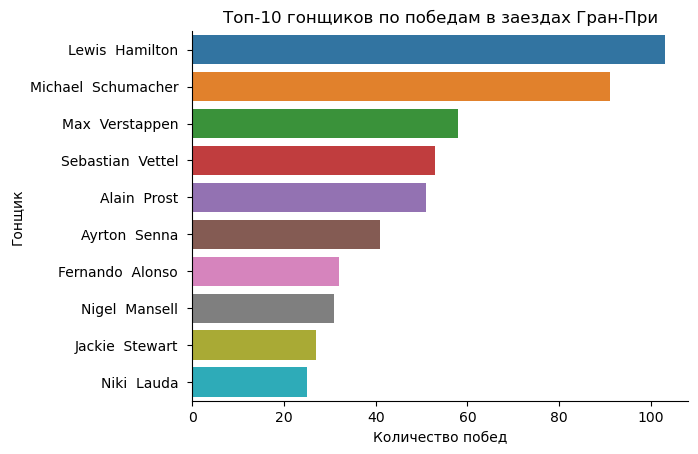

In [171]:
sns.barplot(top_10_winners, x = 'races_won', y='racer')
plt.title('Топ-10 гонщиков по победам в заездах Гран-При')
plt.xlabel('Количество побед')
plt.ylabel('Гонщик')
sns.despine()

Льюис Хэмилтон занимает первое место, после него с небольшим отрывом идет Михаэль Шумахер и тройку лидеров замыкает Макс Ферстаппен

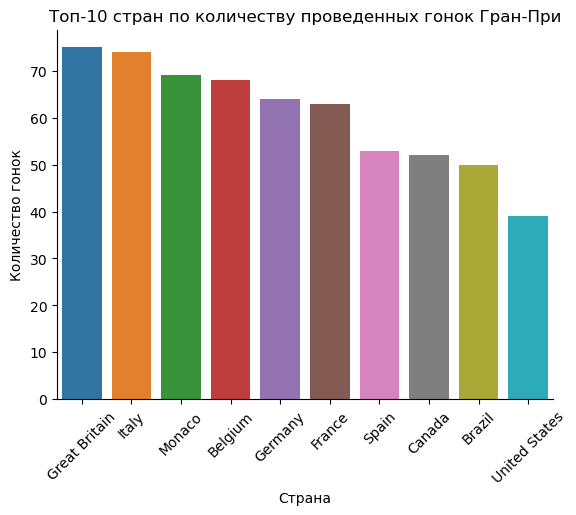

In [172]:
# Посмотрим теперь, в каких странах чаще всего проводились гонки
sns.countplot(winners, x='grand_prix', order=winners.grand_prix.value_counts().iloc[:10].index)
plt.title('Топ-10 стран по количеству проведенных гонок Гран-При')
plt.xlabel('Страна')
plt.ylabel('Количество гонок')
plt.xticks(rotation=45)
sns.despine()

In [173]:
# Найдем среднее время прохождения трассы для топ-10 гонщиков 
top_10_racers_mean_time = winners.loc[winners['winner'].isin(top_10_winners.racer)].groupby('winner', as_index=False).agg({'grand_prix': 'count', 'time' : 'mean'}).rename(columns={'winner' : 'racer', 'grand_prix': 'races_won'}).sort_values('time')
top_10_racers_mean_time

,racer,races_won,time
7,Nigel Mansell,31,0 days 01:33:07.416096774
6,Michael Schumacher,91,0 days 01:33:58.120505494
0,Alain Prost,51,0 days 01:34:31.332568627
5,Max Verstappen,58,0 days 01:35:20.638000
9,Sebastian Vettel,53,0 days 01:36:40.762849056
4,Lewis Hamilton,103,0 days 01:38:07.019533980
2,Fernando Alonso,32,0 days 01:39:14.132625
1,Ayrton Senna,41,0 days 01:39:56.899243902
8,Niki Lauda,25,0 days 01:40:19.823680
3,Jackie Stewart,27,0 days 01:55:41.443851851


In [174]:
top_10_racers_mean_time['time'] = (top_10_racers_mean_time.time.dt.seconds / 60).round(2)
top_10_racers_mean_time

,racer,races_won,time
7,Nigel Mansell,31,93.12
6,Michael Schumacher,91,93.97
0,Alain Prost,51,94.52
5,Max Verstappen,58,95.33
9,Sebastian Vettel,53,96.67
4,Lewis Hamilton,103,98.12
2,Fernando Alonso,32,99.23
1,Ayrton Senna,41,99.93
8,Niki Lauda,25,100.32
3,Jackie Stewart,27,115.68


In [175]:
order = top_10_racers_mean_time.sort_values('races_won', ascending=False)['racer']

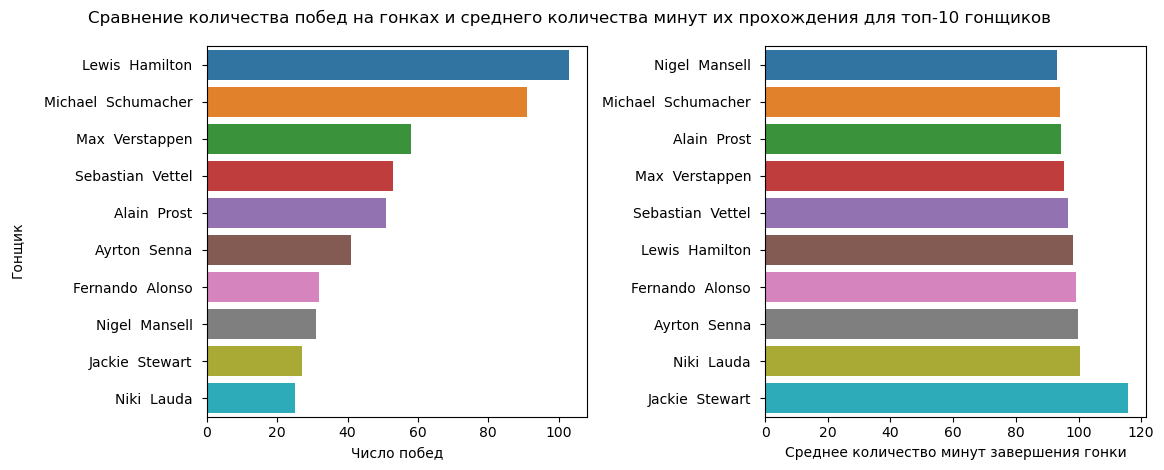

In [176]:
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
sns.barplot(top_10_racers_mean_time, x='races_won', y='racer', order=order, ax=axs[0]).set(xlabel='Число побед', ylabel=None)
sns.barplot(top_10_racers_mean_time, x='time', y='racer', ax=axs[1]).set(xlabel='Среднее количество минут завершения гонки', ylabel=None)
fig.text(0.04, 0.5, 'Гонщик', ha='center', va='center', rotation='vertical')
fig.suptitle('Сравнение количества побед на гонках и среднего количества минут их прохождения для топ-10 гонщиков')
plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.show()

Несмотря на первое место по количеству побед в заездах, Льиюс Хэмилтон в среднем заканчивал гонку за 98 минут, тогда как Михаэль Шумахер заканчивал гонку в среднем за 94 минуты 

In [177]:
# Посмотрим, как менялось количество заездов с течением времени
years = winners.date.dt.year.value_counts().to_frame().sort_values('date')

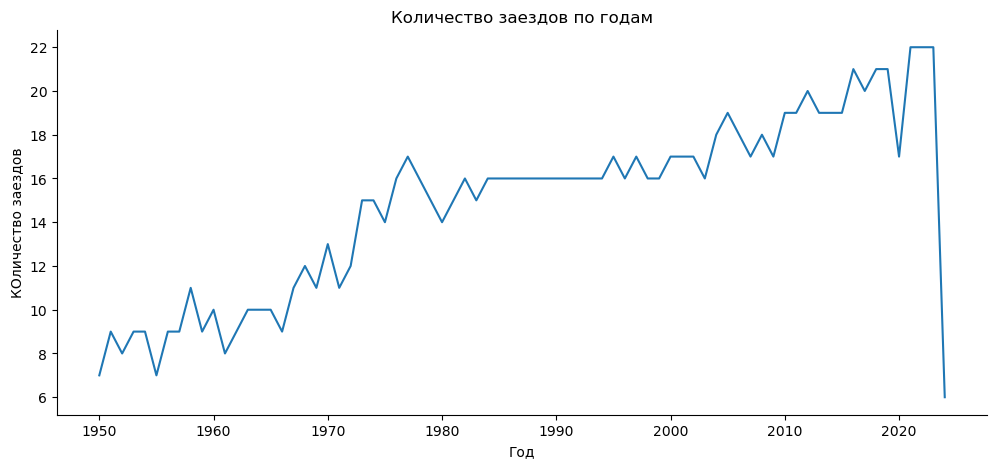

In [178]:
# Посмотрим, как менялось количество заездов с течением времени в том числе с помощью скользящего среднего
plt.figure(figsize = (12, 5))
ax = sns.lineplot(years)
ax.get_legend().remove()
plt.title('Количество заездов по годам')
plt.xlabel('Год')
plt.ylabel('КОличество заездов')
sns.despine()

Количество заездов с течением времени увеличивается, а спад графика объясняется тем, что данные взяты на середину 2024 года, из-за чего не все заезды еще включены

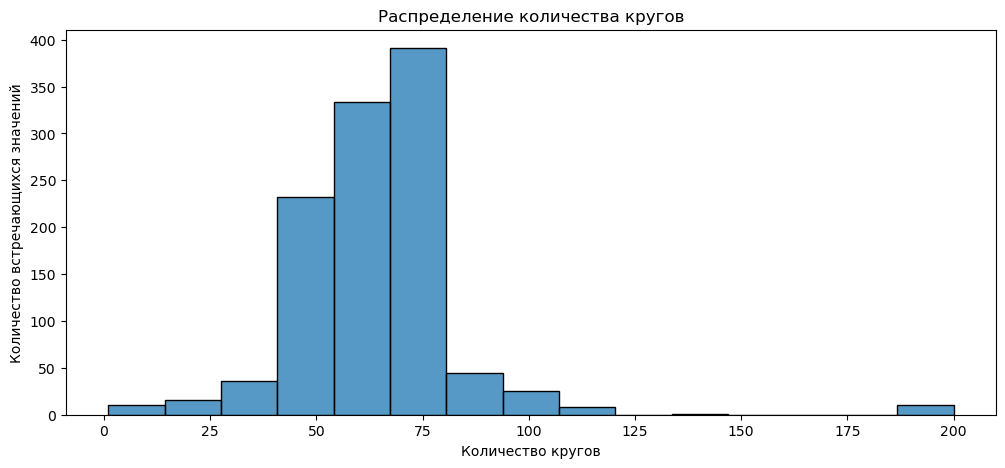

<Figure size 640x480 with 0 Axes>

In [179]:
# Посмотрим распределение кругов в представленном наборе данных
plt.figure(figsize=(12,5))
sns.histplot(winners, x='laps', bins=15)
plt.title('Распределение количества кругов')
plt.xlabel('Количество кругов')
plt.ylabel('Количество встречающихся значений')
plt.show()
sns.despine()

In [180]:
winners.laps.describe()

count    1107.000000
mean       64.654020
std        20.267526
min         1.000000
25%        54.000000
50%        65.000000
75%        72.000000
max       200.000000
Name: laps, dtype: float64

Таким образом, медианное значение числа кругов равняется 65, тогда как среднее сильно не отличается слишком сильно - 64.65. В целом, распределение смещено в левую сторону из-за наличия небольшого количества высоких значений (от 100 до 200)

In [181]:
#Посчитаем и визулизируем количество побед в заездах по компаниям/машинам
car_winners = winners.groupby('car', as_index = False).size().sort_values('size', ascending=False)
car_winners

,car,size
17,Ferrari,245
39,Mercedes,116
37,McLaren Mercedes,80
61,Williams Renault,64
29,Lotus Ford,47
...,...,...
20,Jordan Ford,1
27,Lotus BRM,1
26,Ligier Mugen Honda,1
44,Racing Point BWT Mercedes,1


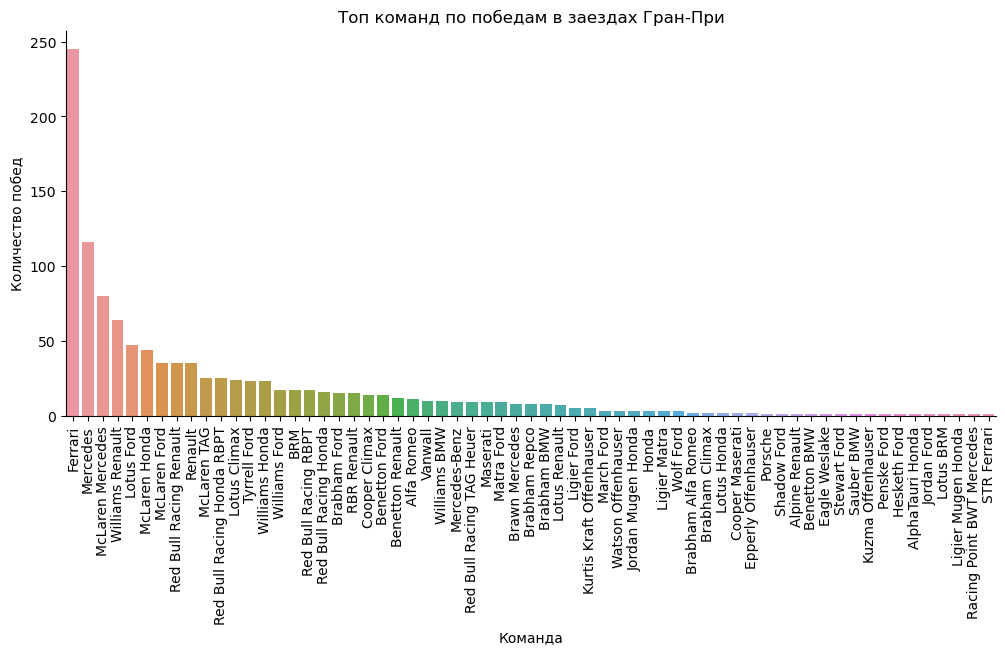

In [182]:
plt.figure(figsize=(12,5))
sns.barplot(car_winners, x = 'car', y='size')
plt.title('Топ команд по победам в заездах Гран-При')
plt.xlabel('Команда')
plt.ylabel('Количество побед')
plt.xticks(rotation=90)
sns.despine()

Безоговорочным лидером является Ferrari, после которого серебро и бронзу делят Mercedes и McLaren Mercedes

# Заключение
К сожалению набор данных был небольшим, но не смотря на это, все равно удалось проанализировать данные и получить интересные инсайты